# Introduction to Data Visualisation and Exploration,COMS4060A

## Neville Modise  

## Question 3  Indian Premier League

### 3.6 Match Summary Exploration

In [1]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cricket = pd.read_csv('all_matches.csv')

In [4]:
#Checking missing values
cricket.isnull().sum()

match_id          0
city             51
match_date        0
umpire1           0
umpire2           0
season            0
team1             0
team2             0
toss_winner       0
toss_decision     0
venue             0
winner            0
mom               4
inning1_bat       0
inning2_bat       0
dtype: int64

City has 54 missing values, mom has 4 missing values 

In [5]:
## Cleaning Data From NaN Values
cricket['city'] = cricket['city'].fillna('Unknown city')
cricket['mom'] = cricket['mom'].fillna('No Result')

In [6]:
# Overall Teams
print(cricket['winner'].unique())

['Chennai Super Kings' 'Delhi Capitals' 'Mumbai Indians' 'Kings XI Punjab'
 'Kochi Tuskers Kerala' 'Royal Challengers Bangalore' 'Gujarat Titans'
 'Punjab Kings' 'Kolkata Knight Riders' 'Delhi Daredevils' 'tie'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Lucknow Super Giants'
 'Rajasthan Royals' 'Deccan Chargers' 'Gujarat Lions'
 'Rising Pune Supergiants' 'no result' 'Rising Pune Supergiant']


Some of the team names were mispelled, and some teams were ranmed, so we fix the team names below

In [7]:
#renaming some teams
cricket = cricket.replace(['Delhi Daredevils'],'Delhi Capitals')
cricket = cricket.replace(['Rising Pune Supergiants'],'Rising Pune Supergiant')
cricket = cricket.replace(['Deccan Chargers'],'Sunrisers Hyderabad')
cricket = cricket.replace(['Kings XI Punjab'],'Punjab Kings')

In [8]:
print(cricket['winner'].unique())

['Chennai Super Kings' 'Delhi Capitals' 'Mumbai Indians' 'Punjab Kings'
 'Kochi Tuskers Kerala' 'Royal Challengers Bangalore' 'Gujarat Titans'
 'Kolkata Knight Riders' 'tie' 'Pune Warriors' 'Sunrisers Hyderabad'
 'Lucknow Super Giants' 'Rajasthan Royals' 'Gujarat Lions'
 'Rising Pune Supergiant' 'no result']


It seems that there are 14 unique teams,

In [9]:
# Here we will find various features for each team
played = pd.concat([cricket['team1'],cricket['team2']], axis=0)
played = played.value_counts().reset_index()
played.columns =['Teams', 'Total Matches Played']
played['winner'] = cricket['winner'].value_counts().reset_index()['winner']
played['percentage'] = played['winner']/played['Total Matches Played']*100

Text(0.5, 1.0, 'Team vs winning percentage')

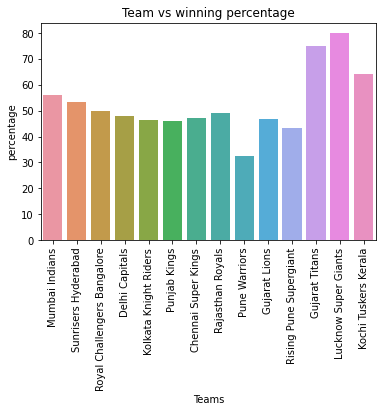

In [10]:
sns.barplot(x='Teams',y='percentage' , data=played).set_xticklabels(played['Teams'], rotation = 90)
plt.title('Team vs winning percentage')

The plot showing the win percentage for all teams is shown above. We can see from the graph that Lucknow Super Giants have the highest winning percentage

In [11]:
# we will print winner of each tournament
season_winner=cricket.drop_duplicates(subset=['season'], keep='last')
season_winner[['season','winner']].reset_index(drop=True).sort_values('season')


,season,winner
1,2007/08,Chennai Super Kings
2,2009,Royal Challengers Bangalore
10,2009/10,Mumbai Indians
9,2011,Punjab Kings
0,2012,Mumbai Indians
13,2013,Chennai Super Kings
7,2014,Chennai Super Kings
5,2015,Chennai Super Kings
4,2016,Delhi Capitals
8,2017,Delhi Capitals


 By grouping the teams with the most wins for each season we were wable to determine the tournament winners winners as shown above.
 Gujarat Titans are the latest winners of the 2022 season.

In [12]:
cricket.toss_decision.value_counts()

field    599
bat      351
Name: toss_decision, dtype: int64

The most frequent decision taken for the winner of the toss is fielding first (bowling)

In [13]:
toss=(cricket["toss_winner"]==cricket["winner"])
toss.sum()

483

The winner of the toss also won the game 483 times

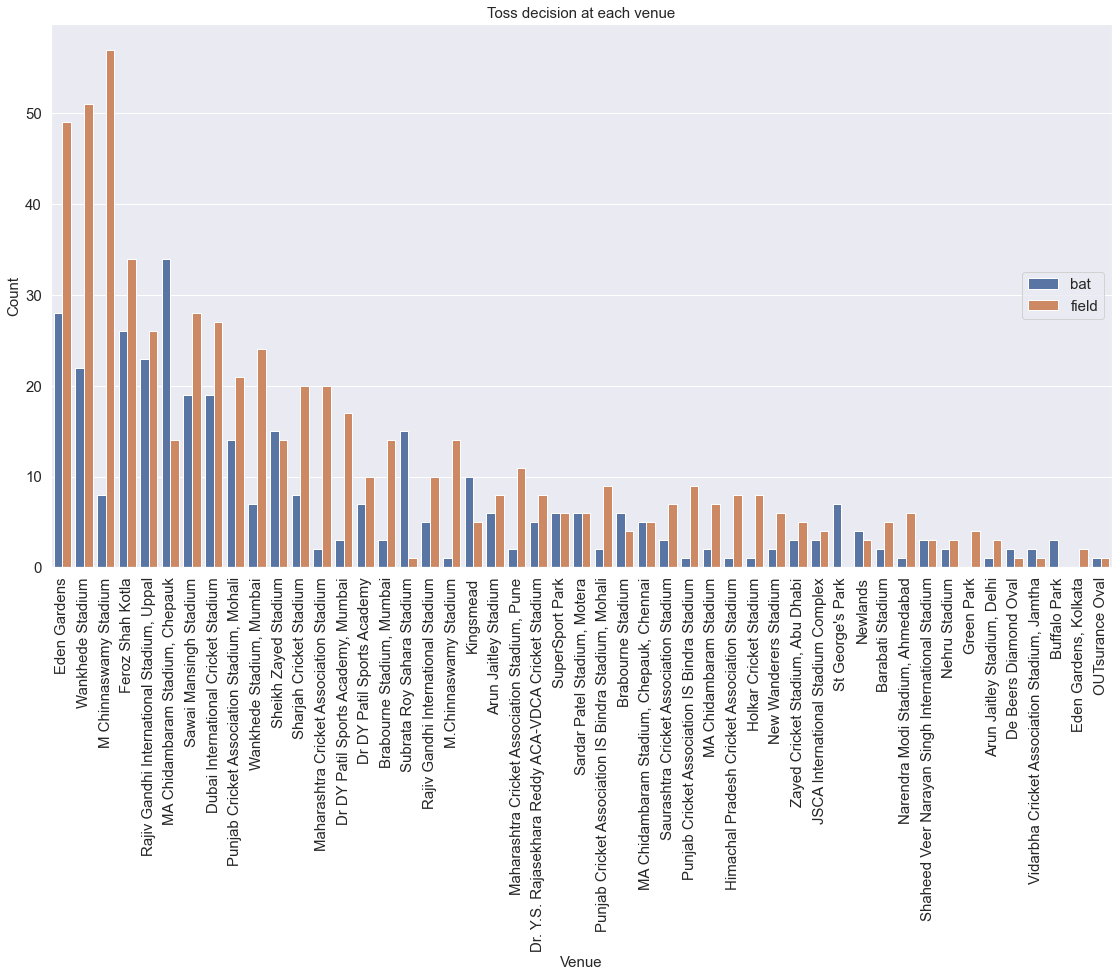

In [14]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(19,10)
sns.countplot(cricket['venue'],order=cricket['venue'].value_counts().index,hue=cricket['toss_decision'])
plt.title('Toss decision at each venue',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Venue',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=5,fontsize=15)
plt.show()

The above plot shows the toss decision, venue wise. We can see how the toss decision changes at various venues

### 3.7 Team scores

In [15]:
delivery = pd.read_csv('all_deliveries.csv')

In [16]:
#Checking missing values
delivery.isnull().sum()

match_id                 0
over                     0
ball_num                 0
inning                   0
is_pp                    0
runs_total               0
runs_extras              0
extras_bowler            0
extras_team              0
runs_batter              0
striker                  0
non_striker              0
bowler                   0
how_out             214803
player_dismissed    214803
dtype: int64

In [17]:
#fill in the misssing numbers with 0
delivery.fillna(0,inplace=True)  

We now determine  and plot the total number of runs scored per match across the seasons.

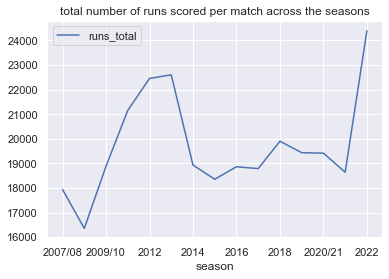

In [18]:
batsmen = cricket[['match_id','season']].merge(delivery, left_on = 'match_id', right_on = 'match_id', how = 'left').drop('match_id', axis = 1)
season=batsmen.groupby(['season'])['runs_total'].sum().reset_index()
season.set_index('season').plot()
plt.title('total number of runs scored per match across the seasons')
plt.show()


The total number of runs scored per match across the seasons are shown in the above plot. We can see that the total number runs are still increasing from 2008, despite decreasing from 2012 until 2021.

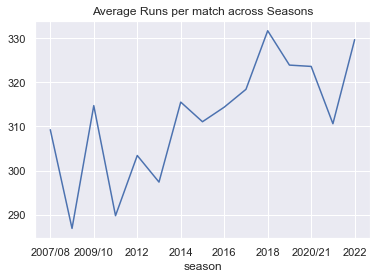

In [19]:
average_run_for_season=cricket.groupby(['season']).count().match_id.reset_index()
average_run_for_season.rename(columns={'match_id':'matches'},inplace=1)
average_run_for_season['runs_total']=season['runs_total']
average_run_for_season['average_runs_per_match']=average_run_for_season['runs_total']/average_run_for_season['matches']
average_run_for_season.set_index('season')['average_runs_per_match'].plot()
plt.title('Average Runs per match across Seasons')
plt.show()

The average number of runs scored per match in each season is shown above. We can see that the average runs per match across seasons flactuate
almost every season/year.

In [20]:
score_data=delivery.groupby(['match_id', 'inning'])['runs_total'].sum().reset_index()
first_score=score_data[score_data['inning']==1]
second_score=score_data[score_data['inning']==2]
first_score=first_score.merge(second_score[['match_id','inning', 'runs_total']], on='match_id')
first_score.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
first_score=first_score[first_score['runs_total_x']>190]
first_score['is_score_chased']=1
first_score['is_score_chased'] = np.where(first_score['runs_total_x']<=first_score['runs_total_y'], 'yes', 'no')

In [21]:
score_data=delivery.groupby(['match_id', 'inning'])['runs_total'].sum().reset_index() 

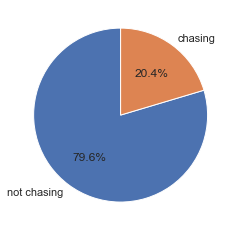

In [22]:
pie_chart=first_score['is_score_chased'].value_counts().reset_index().is_score_chased
list(pie_chart)
labels=['not chasing','chasing']
plt.pie(pie_chart,labels=labels,startangle=90,autopct='%1.1f%%')
plt.show()

if 1st innings total is above 190, you have higher chance of winning the match i.e you have 79.6% chance of winning

In [23]:
first_score['is_score_chased'].value_counts().reset_index().is_score_chased

0    125
1     32
Name: is_score_chased, dtype: int64

In [24]:
season_data=cricket[['match_id','season','winner']]
wholedf=delivery.merge(season_data,how='inner',left_on='match_id',right_on='match_id')

In [25]:
# we will print no of sixes hit by team
sixdf=wholedf[wholedf['runs_batter']==6]

In [26]:
#total number of sixes in each season
sixdf.groupby('season')['runs_batter'].agg([('six','count')]).reset_index()

,season,six
0,2007/08,623
1,2009,508
2,2009/10,587
3,2011,639
4,2012,733
5,2013,681
6,2014,715
7,2015,692
8,2016,639
9,2017,706


The total number of sixes hit in each season is shown above.

### 3.8 Batting

In [27]:
deliveries = pd.read_csv('all_deliveries.csv')
strikerdf = deliveries.groupby(["match_id", "inning", "striker"])
batsmen = strikerdf["runs_batter"].sum().reset_index()
deliver_faced = deliveries.groupby(["match_id", "inning", "striker"])["ball_num"].count().reset_index()
deliver_faced.columns = ["match_id", "inning", "striker", "deliver_faced"]
batsmen = batsmen.merge(deliver_faced, left_on=["match_id", "inning", "striker"], 
                        right_on=["match_id", "inning", "striker"], how="left")
fours = deliveries[ deliveries["runs_batter"] == 4]
sixes = deliveries[ deliveries["runs_batter"] == 6]
bat_four_df = fours.groupby(["match_id", "inning", "striker"])["runs_batter"].count().reset_index()
bat_six_df = sixes.groupby(["match_id", "inning", "striker"])["runs_batter"].count().reset_index()
bat_four_df.columns = ["match_id", "inning", "striker", "4s"]
bat_six_df.columns = ["match_id", "inning", "striker", "6s"]
batsmen = batsmen.merge(bat_four_df, left_on=["match_id", "inning", "striker"], 
                        right_on=["match_id", "inning", "striker"], how="left")
batsmen = batsmen.merge(bat_six_df, left_on=["match_id", "inning", "striker"], 
                        right_on=["match_id", "inning", "striker"], how="left")
for col in ["runs_batter", "4s", "6s","deliver_faced"]:
    batsmen[col] = batsmen[col].fillna(0)

In [28]:
batsmen.head()

,match_id,inning,striker,runs_batter,deliver_faced,4s,6s
0,335982,1,BB McCullum,158,77,10.0,13.0
1,335982,1,DJ Hussey,12,12,1.0,0.0
2,335982,1,Mohammad Hafeez,5,3,1.0,0.0
3,335982,1,RT Ponting,20,20,1.0,1.0
4,335982,1,SC Ganguly,10,12,2.0,0.0


The total number of runs, 4s,6s and deliveries of each player in each match are shown above

In [29]:
Batsman_score=deliveries.groupby('striker')["runs_batter"].agg(sum).reset_index().sort_values(by="runs_batter",ascending=False).reset_index(drop=True)
Batsman_score.head()

,striker,runs_batter
0,V Kohli,6634
1,S Dhawan,6244
2,DA Warner,5883
3,RG Sharma,5881
4,SK Raina,5536


The total runs are shown above in in the runs_batter column

In [30]:
bat_ball_face=deliveries.groupby(['striker'])["ball_num"].count().reset_index().sort_values(by="ball_num",ascending=False).reset_index(drop=True)
bat_ball_face.head()

,striker,ball_num
0,V Kohli,5266
1,S Dhawan,5083
2,RG Sharma,4632
3,DA Warner,4313
4,SK Raina,4177


The total number of deliveries are shown above in the ball_num column

In [31]:
batter_four=deliveries.groupby(['striker'])["runs_batter"].agg(lambda x: (x==4).sum()).reset_index().sort_values(by="runs_batter",ascending=False).reset_index(drop=True)
batter_four.columns = ["striker", "Number of 4s"]
batter_four.head()

,striker,Number of 4s
0,S Dhawan,701
1,V Kohli,581
2,DA Warner,577
3,RG Sharma,519
4,SK Raina,506


The total number of fours are shown above

In [32]:
batter_six=deliveries.groupby("striker")["runs_batter"].agg(lambda x: (x==6).sum()).reset_index().sort_values(by="striker",ascending=False).reset_index(drop=True)
batter_six.columns = ["striker","Number of 6s"]
batter_six.head()

,striker,Number of 6s
0,Z Khan,2
1,Yuvraj Singh,149
2,Younis Khan,0
3,Yashpal Singh,0
4,Yash Dayal,0


The total number of 6s for each player are shown above.

In [33]:
batter_strike_df= pd.merge(Batsman_score,bat_ball_face,on="striker",how='outer')
batter_strike_df["strike_rate"]= (batter_strike_df["runs_batter"]/batter_strike_df["ball_num"])*100
batter_strike_df= batter_strike_df[["striker","strike_rate"]]
batter_strike_df=batter_strike_df.sort_values(by="strike_rate",ascending=False).reset_index(drop=True)
batter_strike_df.head()

,striker,strike_rate
0,PN Mankad,400.000000
1,B Stanlake,250.000000
2,Umar Gul,205.263158
3,RS Sodhi,200.000000
4,TH David,198.936170


The strike rate for each player is shown above.

In [34]:
diss_matches_df = deliveries[["match_id","player_dismissed"]]
diss_matches_df =diss_matches_df .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
diss_matches_df.columns=["striker","Number of matches"]

In [35]:
batter_avg=pd.merge(Batsman_score,diss_matches_df ,on="striker")
batter_avg["Average"]=(batter_avg["runs_batter"]/batter_avg["Number of matches"])
batter_avg=batter_avg.sort_values(by="Average",ascending=False).reset_index(drop=True)
batter_avg.head()

,striker,runs_batter,Number of matches,Average
0,MN van Wyk,167,3,55.666667
1,KL Rahul,3895,83,46.927711
2,AC Voges,181,4,45.250000
3,HM Amla,577,13,44.384615
4,Iqbal Abdulla,88,2,44.000000


The averages of each player are printed above.

Text(0.5, 1.0, 'The total number of runs for all players over all time')

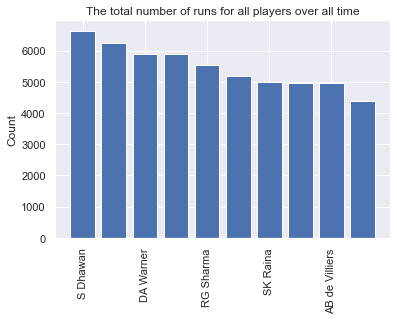

In [36]:
Top_batsman_score = Batsman_score.iloc[:10,:]
labels = np.array(Top_batsman_score['striker'])
ind = np.arange(len(labels)) 
fig, ax = plt.subplots() 
depict = ax.bar(ind, np.array(Top_batsman_score['runs_batter']))
ax.set_xticklabels(labels, rotation='vertical') 
ax.set_ylabel("Count")
ax.set_title("The total number of runs for all players over all time")


The total number of runs for all players over all time is shown above

In [37]:
batsmen = cricket[['match_id','season']].merge(batsmen, left_on = 'match_id', right_on = 'match_id', how = 'left').drop('match_id', axis = 1)

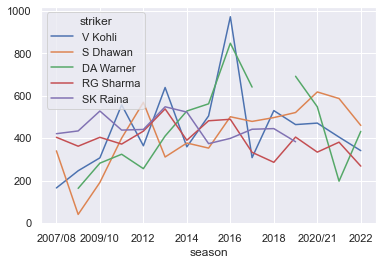

In [38]:
batsman_runsperseason = batsmen.groupby(['season', 'striker'])['runs_batter'].sum().reset_index()
batsman_runsperseason = batsman_runsperseason.groupby(['season', 'striker'])['runs_batter'].sum().unstack().T
batsman_runsperseason['Total'] = batsman_runsperseason.sum(axis=1) #add total column to find batsman with the highest runs
batsman_runsperseason = batsman_runsperseason.sort_values(by = 'Total', ascending = False).drop('Total', 1)
ax = batsman_runsperseason[:5].T.plot()

From the graph we can single out V Kohli as an example and summarize the his performance has been increasing over the years, but started to go down after 2016

Text(0.5, 1.0, 'averages for all batsmen given minimum of 500 runs')

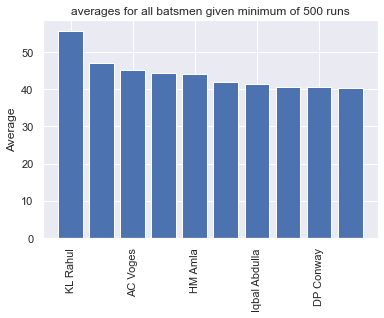

In [39]:
batter_avgreduce = batter_avg.iloc[:10,:]
labels = np.array(batter_avgreduce['striker'])
ind = np.arange(len(labels))
fig, ax = plt.subplots() # for figure
depict = ax.bar(ind, np.array(batter_avgreduce["Average"]))
ax.set_xticklabels(labels, rotation='vertical') 
ax.set_ylabel("Average")
ax.set_title("averages for all batsmen given minimum of 500 runs")

The averages for all batsmen given minimum of 500 runs is shown above.

In [40]:
batter_six.sort_values(by='Number of 6s', ascending=False).head()

,striker,Number of 6s
496,CH Gayle,359
577,AB de Villiers,253
174,RG Sharma,241
265,MS Dhoni,229
353,KA Pollard,224


We showed the players who have hit the most sixes, they are CH Gayle, AB de Villiers, RG Sharma etc.

<AxesSubplot:>

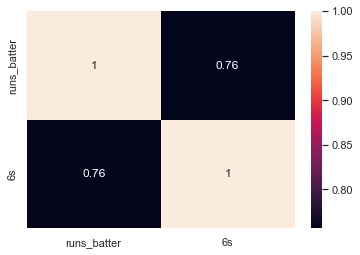

In [41]:
cor = batsmen[['runs_batter','6s']].corr()
sns.heatmap(cor,annot=True)

There is a strong correlation between the number of sixes scored and the number of runs scored.

<AxesSubplot:>

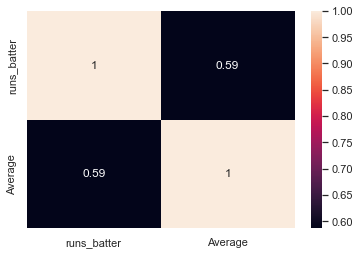

In [42]:
cor=batter_avg[['runs_batter','Average']].corr()
sns.heatmap(cor,annot=True)

There is also a strong correlation between runs scored and the average

Therefore we can summarize that there strong correlation between runs scored, average,
strike rate, and number of sixes

### 3.9 Bowlers

In [43]:
bowler_grp = deliveries.groupby(["match_id", "inning", "bowler", "over"])
bowlers = bowler_grp["runs_total","extras_bowler","runs_extras"].sum().reset_index()
bowlers["runs"] = bowlers["runs_total"] - (bowlers["runs_extras"] + bowlers["extras_bowler"])
sent_off_how = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
sent_off = deliveries[deliveries["how_out"].isin(sent_off_how)]
sent_off = sent_off.groupby(["match_id", "inning", "bowler", "over"])["how_out"].count().reset_index()
sent_off.rename(columns={"how_out": "wickets"}, inplace=True)
bowlers = bowlers.merge(sent_off, left_on=["match_id", "inning", "bowler", "over"], 
                        right_on=["match_id", "inning", "bowler", "over"], how="left")
bowlers["wickets"] = bowlers["wickets"].fillna(0)
bowlers_over = bowlers.groupby(['match_id', 'inning', 'bowler'])['over'].count().reset_index()
bowlers = bowlers.groupby(['match_id', 'inning', 'bowler']).sum().reset_index().drop('over', 1)
bowlers = bowlers_over.merge(bowlers, on=["match_id", "inning", "bowler"], how = 'left')
bowlers = cricket[['match_id','season']].merge(bowlers, left_on = 'match_id', right_on = 'match_id', how = 'left')

In [44]:
bowlers.tail(5)

,match_id,season,inning,bowler,over,runs_total,extras_bowler,runs_extras,runs,wickets
11248,1136596,2018,2,Avesh Khan,3,47,1,1,45,0.0
11249,1136596,2018,2,DT Christian,4,37,0,0,37,0.0
11250,1136596,2018,2,GJ Maxwell,1,4,0,0,4,0.0
11251,1136596,2018,2,LE Plunkett,4,27,1,1,25,1.0
11252,1136596,2018,2,TA Boult,4,30,3,3,24,0.0


The total number of wickets,runs scored off for each bowler are showed above

In [45]:
bowler_faced = deliveries.groupby(["match_id", "inning", "bowler"])["ball_num"].count().reset_index()
bowler_faced.head(5)

,match_id,inning,bowler,ball_num
0,335982,1,AA Noffke,25
1,335982,1,CL White,7
2,335982,1,JH Kallis,25
3,335982,1,P Kumar,25
4,335982,1,SB Joshi,18


The total number of deliveries for each bowler are shown above in the ball_num column.

In [46]:
wicket_by_bowlert = deliveries[deliveries["how_out"] != "run out"]
wicket_by_bowlert= wicket_by_bowlert[["bowler","player_dismissed"]]
wicket_by_bowlert = wicket_by_bowlert.dropna()
wicket_by_bowlert= wicket_by_bowlert.groupby("bowler")["player_dismissed"].count().reset_index().sort_values(by="player_dismissed",ascending=False).reset_index(drop=True)
wicket_by_bowlert.columns=["bowler","Wickets"]
wicket_by_bowlert.iloc[:5,:]

,bowler,Wickets
0,DJ Bravo,183
1,SL Malinga,170
2,YS Chahal,166
3,A Mishra,166
4,R Ashwin,157


The total number of wickets for each playerover all matches are shown above

In [47]:
Bowler_over= deliveries[deliveries["runs_extras"]==0][["ball_num","bowler"]]
Bowler_over= Bowler_over.groupby("bowler")["ball_num"].count().reset_index().sort_values(by="ball_num",ascending=False).reset_index(drop=True)
Bowler_over["No_of_Overs"]=(Bowler_over["ball_num"]/6)


In [48]:
Bowler_Runs= deliveries.groupby("bowler")["runs_total"].sum().reset_index().sort_values(by="runs_total",ascending=False).reset_index(drop=True)
Bowler_Runs.columns=["bowler","bowling_runs_total"]
Bowler_Runs.head()

,bowler,bowling_runs_total
0,R Ashwin,4596
1,DJ Bravo,4436
2,PP Chawla,4368
3,RA Jadeja,4114
4,Harbhajan Singh,4101


The total number of runs scored off their bowling are shown above.

In [49]:
Bow_eco= pd.merge(Bowler_Runs,Bowler_over,on="bowler")

In [50]:
Bow_eco["Economy_rate"]=Bow_eco["bowling_runs_total"]/Bow_eco["No_of_Overs"]
Bow_eco=Bow_eco.sort_values(by="Economy_rate").reset_index(drop=True)
Bow_eco.iloc[:5,:]

,bowler,bowling_runs_total,ball_num,No_of_Overs,Economy_rate
0,AC Gilchrist,0,1,0.166667,0.000000
1,Sachin Baby,8,10,1.666667,4.800000
2,AM Rahane,5,6,1.000000,5.000000
3,NB Singh,18,21,3.500000,5.142857
4,DJ Thornely,40,42,7.000000,5.714286


The bowling economy for each player is shown above.

In [51]:
Bowler_avg = pd.merge(Bowler_Runs,wicket_by_bowlert,on="bowler")
Bowler_avg["Average"]=Bowler_avg["bowling_runs_total"]/Bowler_avg["Wickets"]
Bowler_avg=Bowler_avg.sort_values(by="Average").reset_index(drop=True)
Bowler_avg.iloc[:5,:]

,bowler,bowling_runs_total,Wickets,Average
0,AC Gilchrist,0,1,0.0
1,Sachin Baby,8,2,4.0
2,AM Rahane,5,1,5.0
3,SS Mundhe,6,1,6.0
4,A Badoni,12,2,6.0


The bowling average for each player is shown above.

<AxesSubplot:ylabel='bowler'>

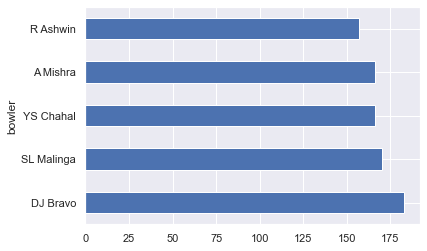

In [52]:
bowlers_wickets = bowlers.groupby(['bowler'])['wickets'].sum()
bowlers_wickets.sort_values(ascending = False, inplace = True)
bowlers_wickets[:5].plot(x= 'bowler', y = 'runs', kind = 'barh')

The distribution of wickets per player is shown above, and the top 5 players are DJ Bravo, SL Malinga, YS Chahal, A Mishra, R Ashwin

In [53]:
Bow_eco=Bow_eco[Bow_eco["No_of_Overs"]>20]
Bow_eco.head()

,bowler,bowling_runs_total,ball_num,No_of_Overs,Economy_rate
8,Mohsin Khan,202,196,32.666667,6.183673
9,A Chandila,245,232,38.666667,6.336207
12,SMSM Senanayake,211,190,31.666667,6.663158
13,Rashid Khan,2411,2166,361.000000,6.678670
15,SM Pollock,307,274,45.666667,6.722628


The top 5 players with the lowest economy rate given that they have bowled at least 20 overs are shown above.

Text(0.5, 1.0, 'The economy rate when given more than 20 overs')

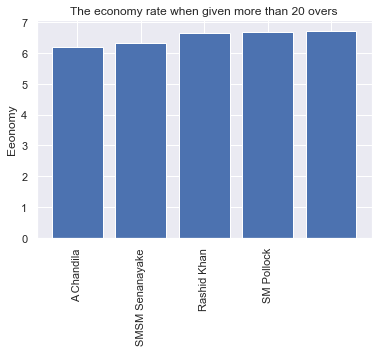

In [54]:
Bow_ecoreduce = Bow_eco.iloc[:5,:]
labels = np.array(Bow_ecoreduce['bowler'])
ind = np.arange(len(labels))
fig, ax = plt.subplots()
depict = ax.bar(ind, np.array(Bow_ecoreduce["Economy_rate"]))
ax.set_xticklabels(labels, rotation='vertical') 
ax.set_ylabel("Eeonomy")
ax.set_title("The economy rate when given more than 20 overs")

In [55]:
Bowler_avg= Bowler_avg[Bowler_avg["Wickets"]>20]
Bowler_avg.head()

,bowler,bowling_runs_total,Wickets,Average
10,Sohail Tanvir,275,22,12.500000
17,A Zampa,373,21,17.761905
22,L Ngidi,460,25,18.400000
23,DE Bollinger,716,38,18.842105
24,PWH de Silva,499,26,19.192308


The top 5 bowlers with the lowest average are shown above

<AxesSubplot:>

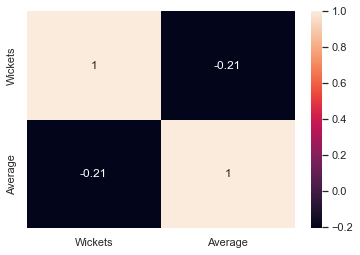

In [56]:
cor=Bowler_avg[['Wickets','Average']].corr()
sns.heatmap(cor,annot=True)

There is a low correlation between wickets and bowling average.

There between wickets taken, bowling average, and economy
rate

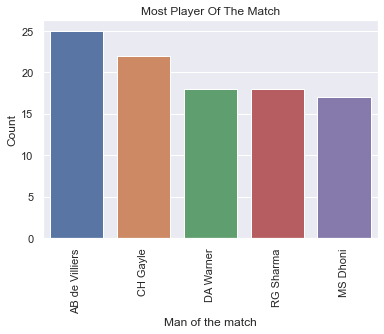

In [57]:
man_of_match=cricket['mom'].value_counts()
man_of_match=man_of_match[:5]
sns.set_style("darkgrid")
man_of_matches=sns.barplot(man_of_match.index, man_of_match.values)
plt.title('Most Player Of The Match')
plt.ylabel('Count')
plt.xlabel('Man of the match')
man_of_matches.set_xticklabels(rotation=90,labels=man_of_match.index)
plt.show()

The above plot shows how frequently a player recieved the man of the match award. We can see that AB de Villiers is the top player followed by CG Gayle